Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [1]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [17]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

In [4]:
# your code here


### 2. Basic EDA based on plots and descriptive statistics

### 3. Aggregating and transforming variables in the dataset

In [73]:
import itertools
from itertools import chain, combinations
shimmer = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']
jitter = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
fun_freq = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
def plot_correlation(combo_list):
    all_combination = list(itertools.combinations(combo_list, 2))
    for i, (x, y) in enumerate(all_combination):
        print( x, y)      
        scat_plt(df[x], df[y], df["status"])

MDVP:Fo(Hz) MDVP:Fhi(Hz)


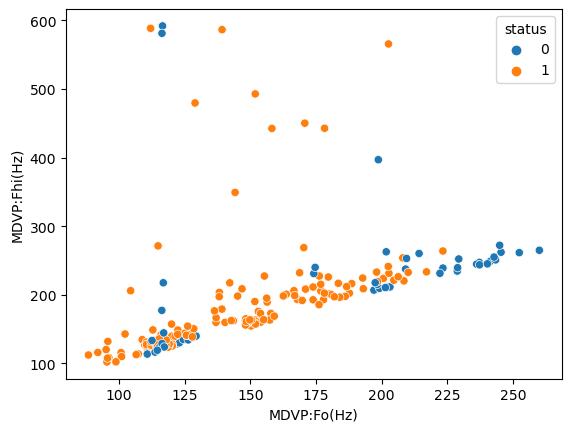

MDVP:Fo(Hz) MDVP:Flo(Hz)


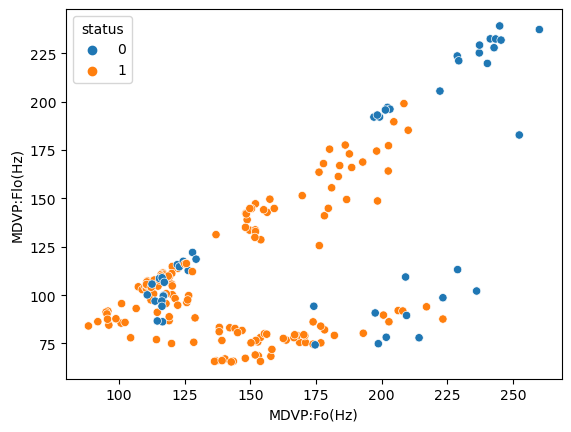

MDVP:Fhi(Hz) MDVP:Flo(Hz)


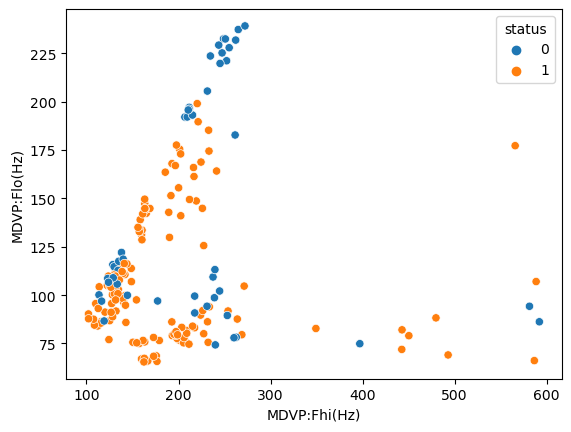

In [74]:
plot_correlation(fun_freq)

MDVP:Jitter(Abs) MDVP:RAP


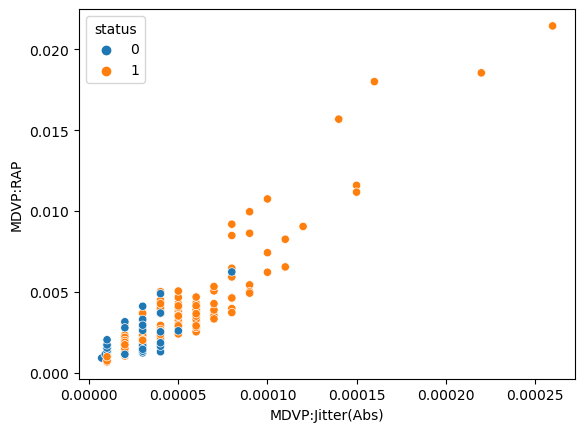

MDVP:Jitter(Abs) MDVP:PPQ


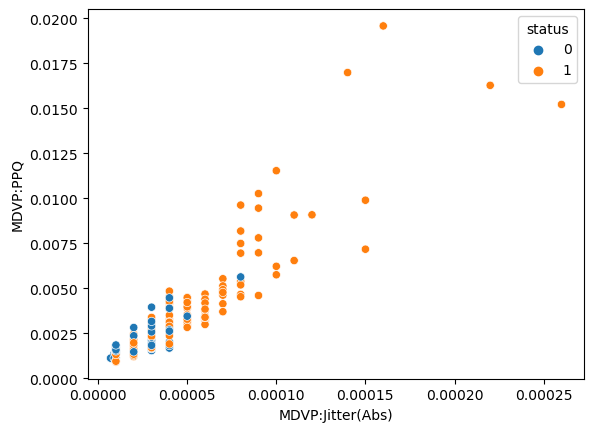

MDVP:Jitter(Abs) Jitter:DDP


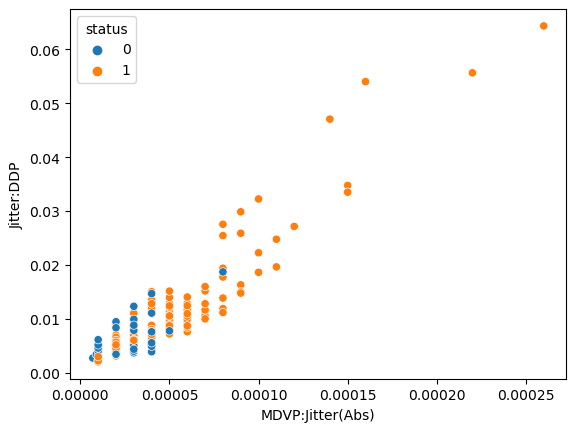

MDVP:RAP MDVP:PPQ


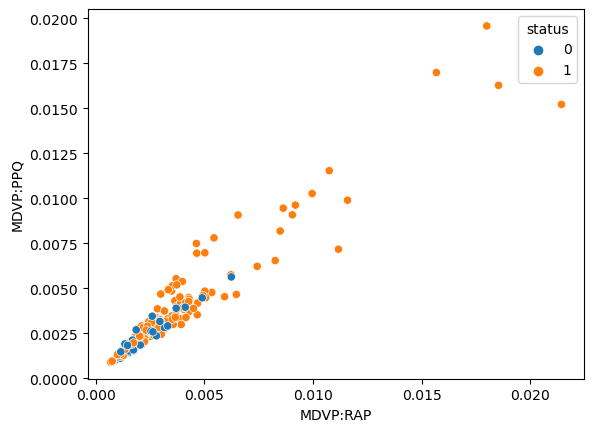

MDVP:RAP Jitter:DDP


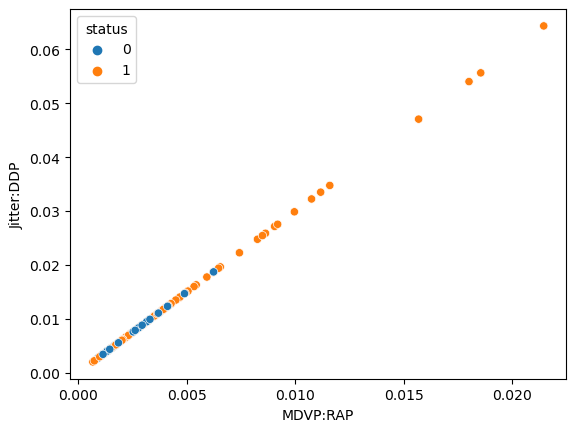

MDVP:PPQ Jitter:DDP


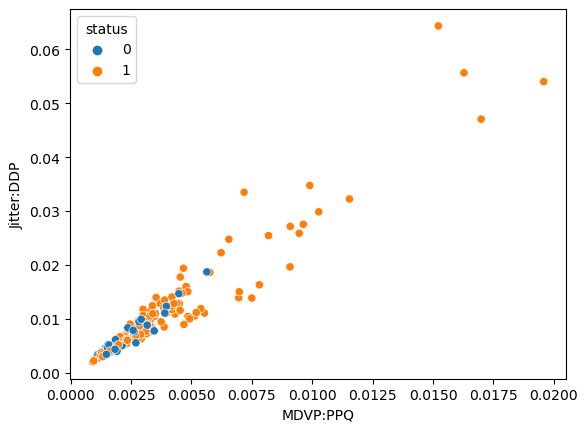

In [75]:
plot_correlation(jitter)

In [89]:
cleaned_df = df[["status","MDVP:PPQ", "Jitter:DDP",'MDVP:RAP', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA' ]]


In [86]:
def group_and_average(df, gv):
    av_df = df.groupby(gv).mean()
    return av_df

agg_df = group_and_average(cleaned_df, "status" )
agg_df

,MDVP:PPQ,Jitter:DDP,MDVP:RAP,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
status,,,,,,,,,,,,
0,0.002056,0.005776,0.001925,181.937771,223.636750,145.207292,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511
1,0.003900,0.011273,0.003757,145.180762,188.441463,106.893558,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027


### 4. Differentiating between controls (healthy subjects) and patients

In [114]:
df_znorm = normalize(cleaned_df, 0)
df_znorm.head()


,status,MDVP:PPQ,Jitter:DDP,MDVP:RAP,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
0,1,0.760800,0.131755,0.132963,-0.829300,-0.436165,-0.952037,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532
1,1,1.276809,0.452684,0.453892,-0.770972,-0.530974,-0.057721,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254
2,1,1.585687,0.721813,0.720770,-0.909476,-0.723168,-0.109875,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323
3,1,1.284076,0.577677,0.578885,-0.909622,-0.649092,-0.114229,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229
4,1,2.047187,1.096793,1.095750,-0.925657,-0.606245,-0.130608,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461


In [115]:
df_mmnorm = normalize(cleaned_df, 1)
df_mmnorm.head()

,status,MDVP:PPQ,Jitter:DDP,MDVP:RAP,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
0,1,0.247588,0.145288,0.145472,0.184308,0.112592,0.054815,0.312215,0.280197,0.332627,0.347354,0.172448,0.332584
1,1,0.323687,0.191042,0.191233,0.198327,0.094930,0.278323,0.472887,0.444536,0.515986,0.535685,0.279424,0.516048
2,1,0.369239,0.229411,0.229287,0.165039,0.059128,0.265288,0.390634,0.326212,0.443374,0.446133,0.219848,0.443317
3,1,0.324759,0.208862,0.209056,0.165004,0.072927,0.264200,0.414278,0.354971,0.475539,0.466079,0.233785,0.475478
4,1,0.437299,0.282870,0.282755,0.161150,0.080909,0.260107,0.499452,0.410025,0.584553,0.577341,0.286852,0.584542


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_classification(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop("status", axis=1), data["status"], test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [123]:
knn_classification(df_mmnorm)

0.8974358974358975

In [121]:
knn_classification(df_znorm)

0.8974358974358975

In [122]:
knn_classification(cleaned_df)

0.7435897435897436

In [ ]:
# The result from the max-min normalization and the z-score normalization are very similar to each other and both show the best result
# compared to the un-normalized one. The accuracy scores from the normalized dataframes are significantly higher as well. 